# NAIVE BAYES CLASSIFIER

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('D3_Heart_Dataset.csv')
data

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
X = data.drop("HeartDisease",axis=1)   # separating predictors
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [14]:
# separating target
Y = data["HeartDisease"]
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [15]:
X['Gender']=X['Gender'].replace('M',1)  # ORDINAL ENCODING
X['Gender']=X['Gender'].replace('F',0)
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat


In [16]:
X['ChestPainType'].unique()  # Feature: ChestPainType

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [17]:
X['ChestPainType']=X['ChestPainType'].replace('ATA',1)
X['ChestPainType']=X['ChestPainType'].replace('NAP',2)
X['ChestPainType']=X['ChestPainType'].replace('ASY',3)
X['ChestPainType']=X['ChestPainType'].replace('TA',4)
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,N,0.0,Up
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat
2,37,1,1,130,283,0,ST,98,N,0.0,Up
3,48,0,3,138,214,0,Normal,108,Y,1.5,Flat
4,54,1,2,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,Normal,132,N,1.2,Flat
914,68,1,3,144,193,1,Normal,141,N,3.4,Flat
915,57,1,3,130,131,0,Normal,115,Y,1.2,Flat
916,57,0,1,130,236,0,LVH,174,N,0.0,Flat


In [18]:
#IMPORTING ALL NECESSARY LIBRARIES
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc, confusion_matrix, classification_report

In [19]:
X['ExerciseAngina']=X['ExerciseAngina'].replace('Y',1)
X['ExerciseAngina']=X['ExerciseAngina'].replace('N',0)
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,Up
1,49,0,2,160,180,0,Normal,156,0,1.0,Flat
2,37,1,1,130,283,0,ST,98,0,0.0,Up
3,48,0,3,138,214,0,Normal,108,1,1.5,Flat
4,54,1,2,150,195,0,Normal,122,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,Normal,132,0,1.2,Flat
914,68,1,3,144,193,1,Normal,141,0,3.4,Flat
915,57,1,3,130,131,0,Normal,115,1,1.2,Flat
916,57,0,1,130,236,0,LVH,174,0,0.0,Flat


In [20]:
X['ST_Slope']=X['ST_Slope'].replace('Up',0)
X['ST_Slope']=X['ST_Slope'].replace('Flat',1)
X['ST_Slope']=X['ST_Slope'].replace('Down',2)
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,0
1,49,0,2,160,180,0,Normal,156,0,1.0,1
2,37,1,1,130,283,0,ST,98,0,0.0,0
3,48,0,3,138,214,0,Normal,108,1,1.5,1
4,54,1,2,150,195,0,Normal,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,Normal,132,0,1.2,1
914,68,1,3,144,193,1,Normal,141,0,3.4,1
915,57,1,3,130,131,0,Normal,115,1,1.2,1
916,57,0,1,130,236,0,LVH,174,0,0.0,1


In [21]:
X['RestingECG']=X['RestingECG'].replace('Normal',1)
X['RestingECG']=X['RestingECG'].replace('ST',2)
X['RestingECG']=X['RestingECG'].replace('LVH',3)
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,0
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,0
3,48,0,3,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,0,1.2,1
914,68,1,3,144,193,1,1,141,0,3.4,1
915,57,1,3,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,3,174,0,0.0,1


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)
print(X_train.shape )
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


In [23]:
from sklearn.naive_bayes import GaussianNB
classifer1 = GaussianNB()  # Creating Gaussian Naive Bayes Object

In [24]:
# Training the model
model1 = classifer1.fit(X_train, Y_train) # supervised learning

In [25]:
# Evaluating the model
Y_pred1 = model1.predict(X_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred1)*100)+"%")
print(confusion_matrix(Y_test, Y_pred1))

The accuracy is 83.15217391304348%
[[60 17]
 [14 93]]


In [26]:
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.78      0.79        77
     class 1       0.85      0.87      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



 # Test the naïve Bayes algorithm with prior probabilities (0.25, 0.75), (0.75, 0.25), and (0.5, 0.5) on heart dataset. 


In [32]:
classifer2 = GaussianNB(priors=[0.25, 0.75]) # unequal priors

model2 = classifer2.fit(X_train, Y_train) # Training the model

Y_pred2 = model2.predict(X_test) # Evaluating the model
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred2)*100)+"%")
print(confusion_matrix(Y_test, Y_pred2))

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred2, target_names=target_names))

The accuracy is 84.23913043478261%
[[58 19]
 [10 97]]
              precision    recall  f1-score   support

     class 0       0.85      0.75      0.80        77
     class 1       0.84      0.91      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [37]:
classifer3 = GaussianNB(priors=[0.75, 0.25]) # unequal priors

model3 = classifer3.fit(X_train, Y_train) # Training the model

Y_pred3 = model3.predict(X_test) # Evaluating the model
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred3)*100)+"%")
print(confusion_matrix(Y_test, Y_pred3))

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred3, target_names=target_names))

The accuracy is 83.69565217391305%
[[63 14]
 [16 91]]
              precision    recall  f1-score   support

     class 0       0.80      0.82      0.81        77
     class 1       0.87      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [38]:
classifer4 = GaussianNB(priors=[0.5, 0.5]) # unequal priors

model4 = classifer4.fit(X_train, Y_train) # Training the model

Y_pred4 = model4.predict(X_test) # Evaluating the model
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred4)*100)+"%")
print(confusion_matrix(Y_test, Y_pred4))

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred4, target_names=target_names))

The accuracy is 83.69565217391305%
[[61 16]
 [14 93]]
              precision    recall  f1-score   support

     class 0       0.81      0.79      0.80        77
     class 1       0.85      0.87      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



# Analyze the performance of naïve Bayes with respect to accuracy, recall, precision, FPR, and ROC metrics obtained for heart dataset.

In [40]:
accuracy = accuracy_score(Y_test, Y_pred1)
recall = recall_score(Y_test, Y_pred1)
precision = precision_score(Y_test, Y_pred1)

fpr, tpr, _ = roc_curve(Y_test, Y_pred1)
roc_auc = auc(fpr, tpr)


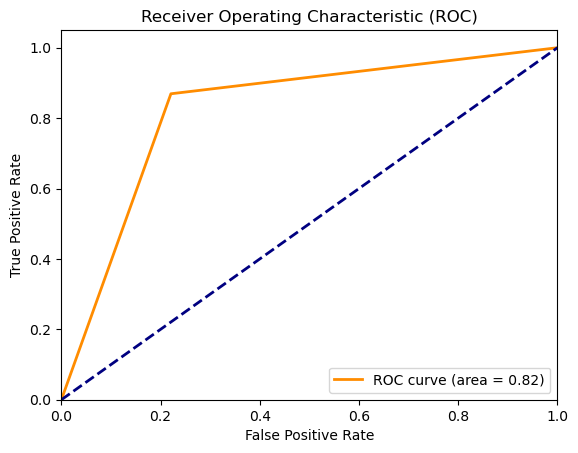

In [43]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", fpr)

Accuracy: 0.8315217391304348
Recall: 0.8691588785046729
Precision: 0.8454545454545455
False Positive Rate: [0.         0.22077922 1.        ]


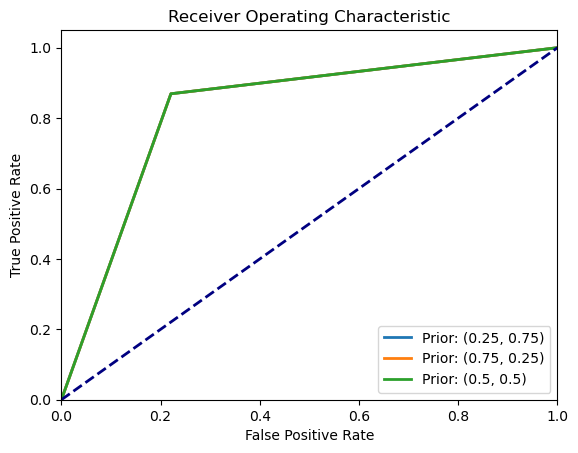

Prior Probabilities	Accuracy	Recall		Precision
(0.25, 0.75)				0.8315	0.8692		0.8455
(0.75, 0.25)				0.8315	0.8692		0.8455
(0.5, 0.5)				0.8315	0.8692		0.8455


In [51]:
prior_probs = [(0.25, 0.75), (0.75, 0.25), (0.5, 0.5)]

accuracies = []
recalls = []
precisions = []
fprs = []
roc_aucs = []

for prior in prior_probs:
    class_dist = np.array(prior)
    modified_counts = class_dist * len(Y_train)
    modified_counts = modified_counts.astype(int)
    modified_y_train = np.concatenate([np.full(count, i) for i, count in enumerate(modified_counts)])

prior_probs = [(0.25, 0.75), (0.75, 0.25), (0.5, 0.5)]

accuracies = []
recalls = []
precisions = []
fprs = []
roc_aucs = []

for prior in prior_probs:
    class_dist = np.array(prior)
    modified_counts = class_dist * len(Y_train)
    modified_counts = modified_counts.astype(int)
    modified_y_train = np.concatenate([np.full(count, i) for i, count in enumerate(modified_counts)])

    accuracy = accuracy_score(Y_test, Y_pred1)
    recall = recall_score(Y_test, Y_pred1)
    precision = precision_score(Y_test, Y_pred1)

    fpr, tpr, _ = roc_curve(Y_test, Y_pred1)
    roc_auc = auc(fpr, tpr)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    fprs.append(fpr)
    roc_aucs.append(roc_auc)

# Plot ROC curves
plt.figure()
for i in range(len(prior_probs)):
    plt.plot(fprs[i], tpr, lw=2, label='Prior: {}'.format(prior_probs[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print("Prior Probabilities\tAccuracy\tRecall\t\tPrecision")
for i in range(len(prior_probs)):
    print("{}\t\t\t\t{:.4f}\t{:.4f}\t\t{:.4f}".format(prior_probs[i], accuracies[i], recalls[i], precisions[i]))
